# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


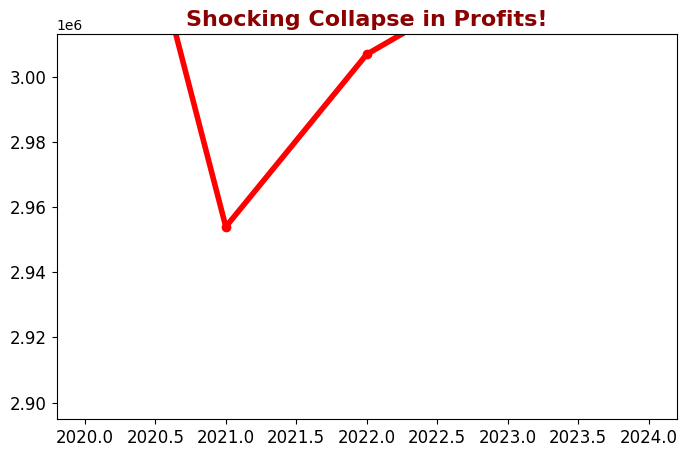

In [2]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:
(double click to open this markdown cell and type into it)

- Title does not explain chart.
- No axis labels or measurement indicators.
- Plot information does not fit inside graph.


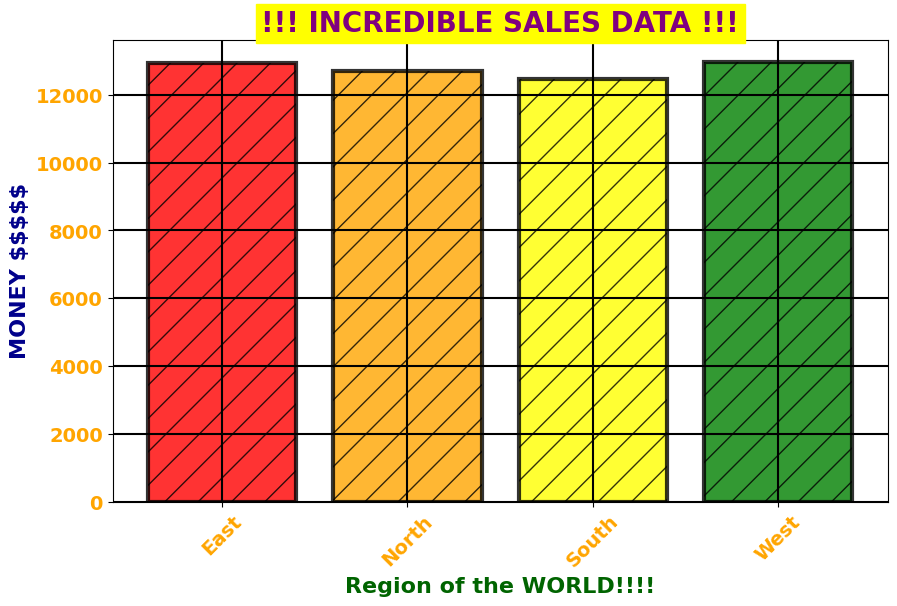

In [3]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
(double click to open this markdown cell and type into it)

- Title does not give any information for graph other than "sales data", distracting labling.
- X axis only lists directional information, does not list as regions. 
- Title at bottom doesn't specify a region, and makes assumptions.
- Y axis only says Money and does not say measurement type specifically, ex. dollars, thousands, or millions.
- Columns have confusing diagonal bars running through them.
- Color of columns have no meaning.
- Too much use of symbols and exclamations.

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [4]:
# Your GOOD visualization(s) here

In [74]:

east_region_df = coffee_df[(coffee_df['Region'] == 'East') & (coffee_df["Year"] == 2024)]
east_total_sales = east_region_df['Sales'].sum()

north_region_df = coffee_df[(coffee_df['Region'] == 'North') & (coffee_df["Year"] == 2024)]
north_total_sales = north_region_df['Sales'].sum()

west_region_df = coffee_df[(coffee_df['Region'] == 'West') & (coffee_df["Year"] == 2024)]
west_total_sales = west_region_df['Sales'].sum()

south_region_df = coffee_df[(coffee_df['Region'] == 'South') & (coffee_df["Year"] == 2024)]
south_total_sales = south_region_df['Sales'].sum()


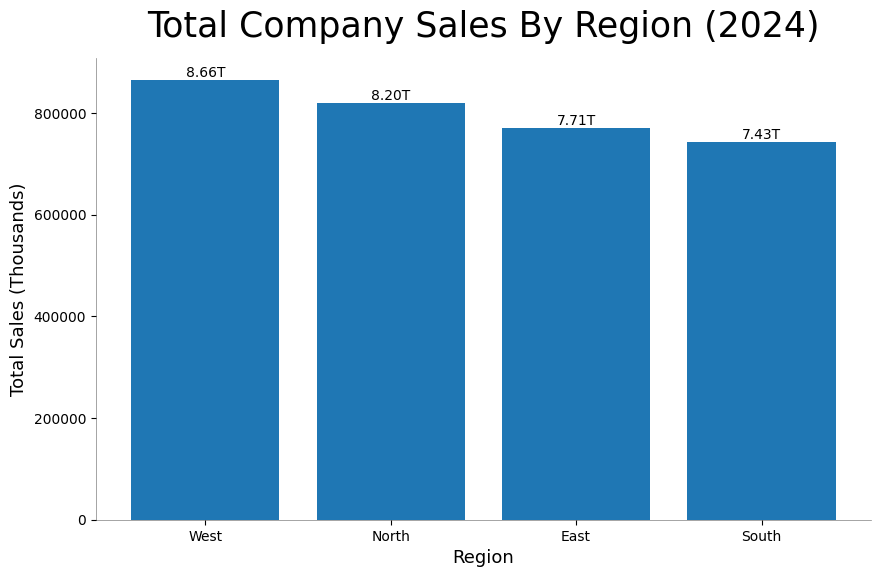

In [152]:
# Total Company Sales By Region for 2024

plt.figure(figsize=(10,6))

region_names = ['West', 'North', 'East', 'South']
region_total_sales = [west_total_sales, north_total_sales, east_total_sales, south_total_sales]

bars = plt.bar(region_names, region_total_sales, width=0.8)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def format_value(value):
    return f'{value / 100_000:,.2f}T'

labels = [format_value(v) for v in region_total_sales]
ax.bar_label(bars,
             fontsize = 10,
             labels = labels)

ax.set_title('Total Company Sales By Region (2024)', 
             fontsize = 25,
             pad = 15,)
ax.set_ylabel('Total Sales (Thousands)',
              fontsize = 13)
ax.set_xlabel('Region',
              fontsize = 13)
plt.show()

I created this chart becuase it acurately and cleanly shows the total sales for each region for 2024 instead of the busy sales chart from before.

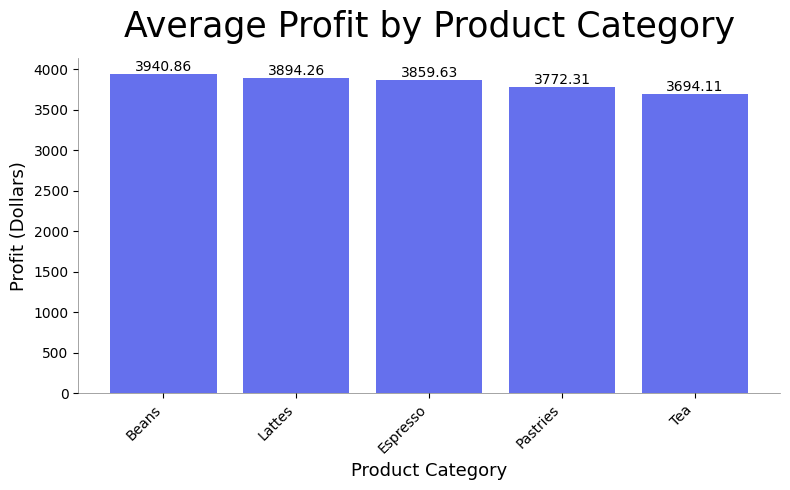

In [151]:
# Average Profit by Category
 
plt.figure(figsize=(8,5))
 
avg_profit = coffee_df.groupby('Category')['Profit'].mean().sort_values(ascending=False)

bars = plt.bar(avg_profit.index, avg_profit.values, color = "#6570ed")
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar_label(bars)

ax.set_title('Average Profit by Product Category', 
             fontsize = 25,
             pad = 15,)
ax.set_ylabel('Profit (Dollars)',
              fontsize = 13)
ax.set_xlabel('Product Category',
              fontsize = 13)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()




I created this chart to show average profits for each category instead of the other chart which did not show all the information.

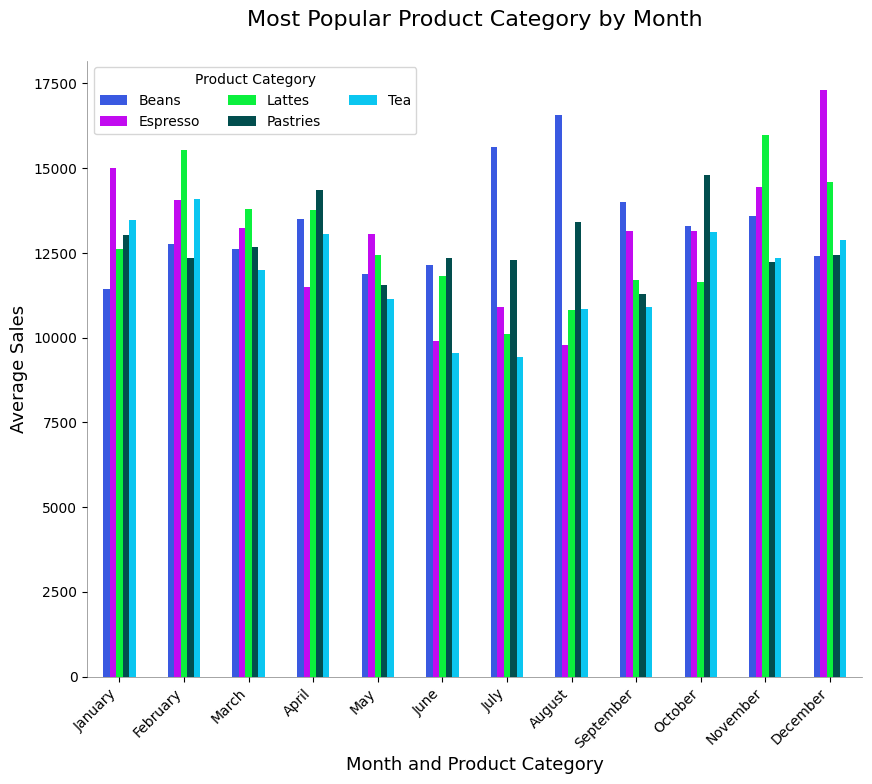

In [150]:
# Most Popular Category by Month

colors = ["#3a59e1", "#c20bf0", "#0bf03d", "#024E4E", "#0bc6f0"]

avg_sales_category = coffee_df.groupby(['Month','Category'])['Sales'].mean().reset_index()

pivot_df = avg_sales_category.pivot(index="Month", 
                                    columns = 'Category',
                                    values = "Sales").reindex(
                                        ['January', 'February', 'March', 'April', 'May', 'June',
                                         'July', 'August', 'September', 'October', 'November', 'December']
                                    )

pivot_df.plot(kind='bar',
               figsize=(10,8),
               color = colors)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Most Popular Product Category by Month',
             fontsize=16,
             pad=25)
ax.set_xlabel('Month and Product Category',
              fontsize=13)
ax.set_ylabel('Average Sales',
              fontsize=13)
plt.xticks(rotation=45, ha="right")


plt.legend(
    loc="upper left"  ,
    title = "Product Category",
    ncol = 3,
)

plt.show()


I create this chart to show the most popular categories for each month because it could be good to know trends for marketing purposes.